In [1]:
import numpy as np
from math import pi
from spatialmath import *

import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib notebook 

# Working in 3D

## Rotation

Rotations in 3D can be represented by rotation matrices – 3x3 orthonormal matrices – which belong to the group $\mbox{SO}(3)$. These are a subset of all possible 3x3 real matrices.

We can create such a matrix, a rotation of $\pi/4$ radians around the x-axis by

In [2]:
R1 = SO3.Rx(pi/4)

which is an object of type

In [4]:
type(R1)

spatialmath.pose3d.SO3

which contains an $\mbox{SO}(3)$ matrix. We can display that matrix

In [5]:
R1

   1         0         0          
   0         0.707107 -0.707107   
   0         0.707107  0.707107   

which is colored red if the console supports color.

The matrix, a numpy array, is encapsulated and not directly settable by the user. This way we can ensure that the matrix is proper member of the $\mbox{SO}(3)$ group.

We can _compose_ these rotations using the Python `*` operator

In [6]:
R1 * R1

   1         0         0          
   0         0        -1          
   0         1         0          

which is a rotation by $\pi/4$ _then_ another rotation by $\pi/4$ which is a total rotation of $\pi/2$ about the X-axis.  We can doublecheck that

In [7]:
SO3.Rx(pi/2)

   1         0         0          
   0         0        -1          
   0         1         0          

We could also have used the exponentiation operator

In [8]:
R1**2

   1         0         0          
   0         0        -1          
   0         1         0          

We can also specify the angle in degrees

In [9]:
SO3.Rx(45, 'deg')

   1         0         0          
   0         0.707107 -0.707107   
   0         0.707107  0.707107   

We can visualize what this looks like by

<IPython.core.display.Javascript object>


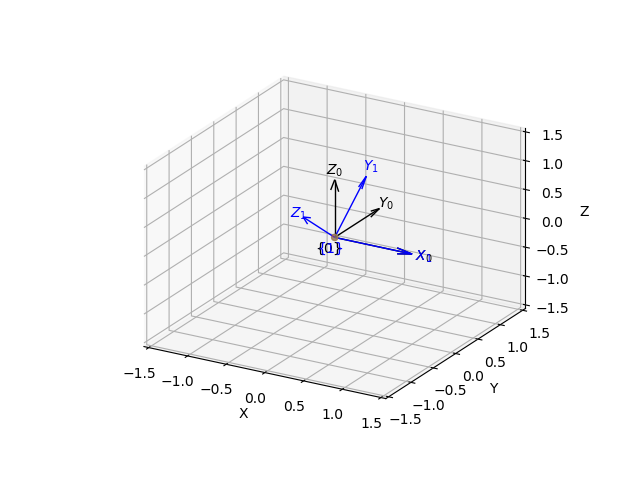

In [10]:
fig = plt.figure() # create a new figure
SE3().plot(frame='0', dims=[-1.5,1.5], color='black')
R1.plot(frame='1')

Click on the coordinate frame and use the mouse to change the viewpoint.  The world reference frame is shown in black, and the rotated frame is shown in blue.

Often we need to describe more complex orientations and we typically use a _3 angle_ convention to do this.  Euler's rotation theorem says that any orientation can be expressed in terms of three rotations about different axes.  

One common convention is roll-pitch-yaw angles

In [11]:
R2 = SO3.RPY([10, 20, 30], unit='deg')
R2

   0.813798 -0.44097   0.378522   
   0.469846  0.882564  0.0180283  
  -0.34202   0.163176  0.925417   

which says that we rotate by 30&deg; about the Z-axis (yaw), _then_ 20&deg; about the Y-axis (pitch) and _then_ 10&deg; about the X-axis – this is the ZYX roll-pitch yaw convention.  Note that:

1. the first rotation in the sequence involves the last element in the angle sequence.
2. we can change angle convention, for example by passing `order='xyz'`

We can visualize the resulting orientation.

<IPython.core.display.Javascript object>


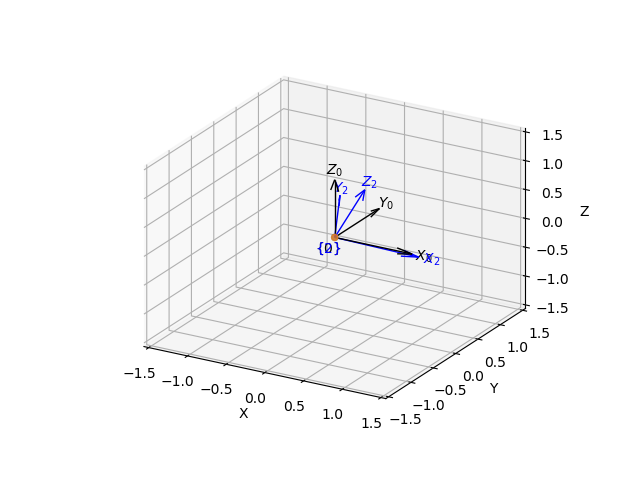

In [12]:
plt.figure() # create a new figure
SE3().plot(frame='0', dims=[-1.5,1.5], color='black')
R2.plot(frame='2')

We can convert any rotation matrix back to its 3-angle representation

In [13]:
R2.rpy

NameError: name 'R' is not defined

### Constructors

The default constructor yields a null rotation

In [14]:
SO3()

   1         0         0          
   0         1         0          
   0         0         1          

which is represented by the identity matrix.

The class supports a number of variant constructors using class methods:

| Constructor   |  rotation |
|---------------|-----------|
| SO3()          | null rotation |
| SO3.Rx(theta)  |  about X-axis |
| SO3.Ry(theta)  |  about Y-axis|
| SO3.Rz(theta)  |  about Z-axis|
| SO3.RPY(rpy)  |  from roll-pitch-yaw angle vector|
| SO3.Eul(euler)  | from Euler angle vector |
| SO3.AngVec(theta, v)  | from rotation and axis |
| SO3.Omega(v)  | from a twist vector |
| SO3.OA  | from orientation and approach vectors |

Imagine we want a rotation that describes a frame that has its y-axis (o-vector) pointing in the world negative z-axis direction and its z-axis (a-vector) pointing in the world x-axis direction

In [15]:
SO3.OA(o=[0,0,-1], a=[1,0,0])

   0         0         1          
  -1         0         0          
   0        -1         0          

We can redo our earlier example using `SO3.Rx()` with the explicit angle-axis notation

In [16]:
SO3.AngVec(pi/4, [1,0,0])

   1         0         0          
   0         0.707107 -0.707107   
   0         0.707107  0.707107   

or

In [17]:
SO3.exp([pi/4,0,0])

TypeError: exp() missing 1 required positional argument: 'arg'

or a more complex example

In [18]:
SO3.AngVec(30, [1,2,3], unit='deg')

   0.875595 -0.381753  0.29597    
   0.420031  0.904304 -0.0762129  
  -0.238552  0.191048  0.952152   

### Properties

The object has a number of properties, such as the columns which are often written as ${\bf R} = [n, o, a]$ where $n$, $o$ and $a$ are 3-vectors.  For example

In [25]:
R1.n

array([1., 0., 0.])

or its inverse (in this case its transpose)

In [26]:
R1.inv

   1         0         0          
   0         0.707107  0.707107   
   0        -0.707107  0.707107   

the shape of the underlying matrix

In [27]:
R1.shape

(3, 3)

and the order

In [28]:
R1.N

3

indicating it operates in 3D space.

### Predicates

We can check various properties of the object using properties and methods that are common to all classes in this package

In [29]:
[R1.isSE, R1.isSO, R1.isrot(), R1.ishom(), R1.isrot2(), R1.ishom2()]

[False, True, True, False, False, False]

The last four in this list provide compatibility with the Spatial Math Toolbox for MATLAB.

## Quaternions

A quaternion is often described as a type of complex number but it is more useful (and simpler) to think of it as an order pair comprising a scalar and a vector.  We can create a quaternions

In [112]:
q1 = Quaternion([1,2,3,4])
q1

1.000000 < 2.000000, 3.000000, 4.000000 >

where the scalar is before the angle brackets which enclose the vector part.  

Properties allow us to extract the scalar part

In [113]:
q1.s

1

and the vector part

In [114]:
q1.v

array([2, 3, 4])

and we can represent it as a numpy array

In [115]:
q1.vec

array([1, 2, 3, 4])

A quaternion has a conjugate

In [116]:
q1.conj

1.000000 < -2.000000, -3.000000, -4.000000 >

and a norm, which is the magnitude of the equivalent 4-vector 

In [117]:
q1.norm

5.477225575051661

We can create a second quaternion

In [118]:
q2 = Quaternion([5,6,7,8])
q2

5.000000 < 6.000000, 7.000000, 8.000000 >

Operators allow us to add

In [119]:
q1 + q2

6.000000 < 8.000000, 10.000000, 12.000000 >

subtract

In [120]:
q1 - q2

-4.000000 < -4.000000, -4.000000, -4.000000 >

and to multiply

In [121]:
q1 * q2

-60.000000 < 12.000000, 30.000000, 24.000000 >

which follows the special rules of Hamilton multiplication.

Multiplication can also be performed as the linear algebraic product of one quaternion converted to a 4x4 matrix  

In [124]:
q1.matrix

array([[ 1, -2, -3, -4],
       [ 2,  1, -4,  3],
       [ 3,  4,  1, -2],
       [ 4, -3,  2,  1]])

and the other as a 4-vector 

In [125]:
q1.matrix @ q2.vec

array([-60,  12,  30,  24])

The product of a quaternion and its conjugate is a scalar equal to the square of its norm

In [127]:
q1 * q1.conj

30.000000 < 0.000000, 0.000000, 0.000000 >

Conversely, a quaternion with a zero scalar part is called a _pure quaternion_

In [128]:
Quaternion.pure([1, 2, 3])

0.000000 < 1.000000, 2.000000, 3.000000 >

### Unit quaternions

A quaternion with a unit norm is called a _unit quaternion_ .  It is a group and its elements represent rotation in 3D space.  It is in all regards like an $\mbox{SO}(3)$ matrix except for a _double mapping_ -- a quaternion and its element-wise negation represent the same rotation.

In [129]:
q1 = UnitQuaternion.Rx(30, 'deg')
q1

0.965926 << 0.258819, 0.000000, 0.000000 >>

the convention is that unit quaternions are denoted using double angle brackets.  The norm, as advertised is indeed one

In [130]:
q1.norm

1.0

We create another unit quaternion

In [131]:
q2 = UnitQuaternion.Ry(-40, 'deg')
q2

0.939693 << 0.000000, -0.342020, 0.000000 >>

The rotations can be composed by quaternion multiplication

In [132]:
q3 = q1 * q2
q3

0.907673 << 0.243210, -0.330366, -0.088521 >>

We can convert a quaternion to a rotation matrix

In [133]:
q3.R

array([[ 0.76604444,  0.        , -0.64278761],
       [-0.3213938 ,  0.8660254 , -0.38302222],
       [ 0.5566704 ,  0.5       ,  0.66341395]])

which yields exactly the same answer as if we'd done it using SO(3) rotation matrices

In [134]:
SO3.Rx(30, 'deg') * SO3.Ry(-40, 'deg')

   0.766044  0        -0.642788   
  -0.321394  0.866025 -0.383022   
   0.55667   0.5       0.663414   

The advantages of unit quaternions are that

1. they are compact, just 4 numbers instead of 9
2. multiplication involves fewer operations and is therefore faster
3. numerical errors build up when we multiply rotation matrices together many times, and they lose the structure (the columns are no longer unit length or orthogonal).  Correcting this, the process of _normalization_ is expensive.  For unit quaternions errors will also compound, but normalization is simply a matter of dividing through by the norm

Unit quaternions have an inverse

In [135]:
q2.inv

0.939693 << -0.000000, 0.342020, -0.000000 >>

In [136]:
q1 * q2.inv

0.907673 << 0.243210, 0.330366, 0.088521 >>

or

In [137]:
q1 / q2

0.907673 << 0.243210, 0.330366, 0.088521 >>

We can convert any unit quaternion to an SO3 object if we wish

In [138]:
q1.SO3

   1         0         0          
   0         0.866025 -0.5        
   0         0.5       0.866025   

and conversely, any `SO3` object to a unit quaternion

In [142]:
UnitQuaternion( SO3.Rx(30, 'deg'))

0.965926 << 0.258819, 0.000000, 0.000000 >>

A unit quaternion is not a minimal representation. Since we know the magnitude is 1, then with any 3 elements we can compute the fourth upto a sign ambiguity. 

In [143]:
q1.vec3

array([0.25881905, 0.        , 0.        ])

In [144]:
a = UnitQuaternion.qvmul( q1.vec3, q2.vec3)
a

array([ 0.24321035, -0.33036609, -0.08852133])

from which we can recreate the unit quaternion

In [145]:
UnitQuaternion.Vec3(a)

0.907673 << 0.243210, -0.330366, -0.088521 >>

## Representing position

In robotics we also need to describe the position of objects and we can do this with a _homogeneous transformation_ matrix – a 4x4 matrix – which belong to the group $\mbox{SE}(3)$ which is a subset of all 4x4 real matrices.

We can create such a matrix, for a translation of 1 in the x-direction, 2 in the y-direction and 3 in the z-direction by

In [30]:
T1 = SE3(1, 2, 3)
T1

   1         0         0         1          
   0         1         0         2          
   0         0         1         3          
   0         0         0         1          

which is displayed in a color coded fashion: rotation matrix in red, translation vector in blue, and the constant bottom row in grey.  We note that the red matrix is an _identity matrix_ .

The class supports a number of variant constructors using class methods.

| Constructor   |  motion |
|---------------|-----------|
| SE3()      | null motion |
| SE3.Tx(d)  |  translation along X-axis |
| SE3.Ty(d)  |  translation along Y-axis |
| SE3.Tz(d)  |  translation along Z-axis |
| SE3.Rx(theta)  |  rotation about X-axis |
| SE3.Ry(theta)  |  rotation about Y-axis|
| SE3.Rz(theta)  |  rotation about Z-axis|
| SE3.RPY(rpy)  |  rotation from roll-pitch-yaw angle vector|
| SE3.Eul(euler)  | rotation from Euler angle vector |
| SE3.AngVec(theta, v)  | rotation from rotation and axis |
| SO3.Omega(v)  | from a twist vector |
| SE3.OA(ovec, avec)  | rotation from orientation and approach vectors |

We can visualize this

<IPython.core.display.Javascript object>


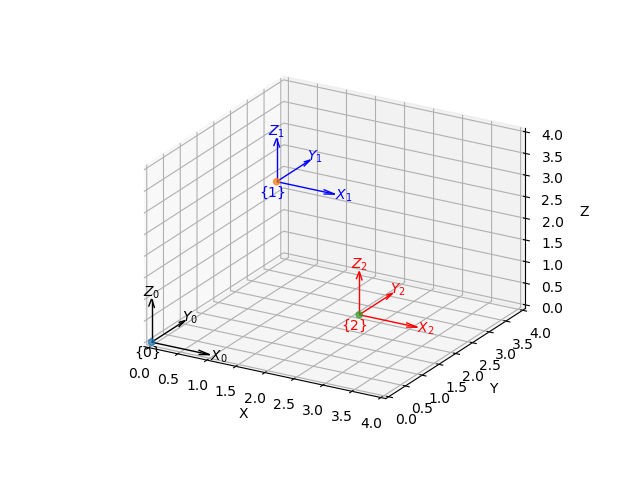

In [32]:
plt.figure() # create a new figure
SE3().plot(frame='0', dims=[0,4], color='black')
T1.plot(frame='1')

We can define another translation

In [33]:
T12 = SE3(2, -1, -2)

and compose it with `T1`

In [34]:
T2 = T1 * T12

In [35]:
T2.plot(frame='2', color='red')

## Representing pose

In [54]:
T1 = SE3(1, 2, 3) * SE3.Rx(30, 'deg')
T1

   1         0         0         1          
   0         0.866025 -0.5       2          
   0         0.5       0.866025  3          
   0         0         0         1          

Is a composition of two motions: a pure translation and _then_ a pure rotation.  We can see the rotation matrix, computed above, in the top-left corner and the translation components in the right-most column.  In the earlier example `Out[24]` was simply a null-rotation which is represented by the identity matrix.

The frame now looks like this

<IPython.core.display.Javascript object>


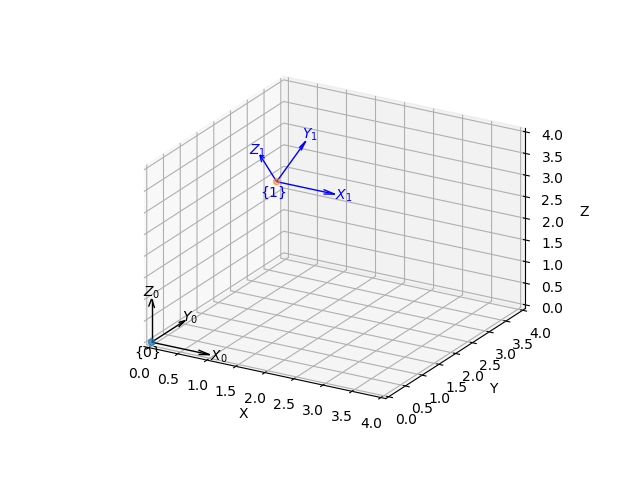

In [55]:
plt.figure() # create a new figure
SE3().plot(frame='0', dims=[0,4], color='black')
T1.plot(frame='1')

### Properties

The object has a number of properties, such as the columns which are often written as $[n, o, a]$

In [56]:
T1.o

array([0.       , 0.8660254, 0.5      ])

or its inverse (computed in an efficient manner based on the structure of the matrix)

In [57]:
T1.inv

   1         0         0        -1          
   0         0.866025  0.5      -3.23205    
   0        -0.5       0.866025 -1.59808    
   0         0         0         1          

We can extract the rotation matrix as a numpy array

In [58]:
T1.R

array([[ 1.       ,  0.       ,  0.       ],
       [ 0.       ,  0.8660254, -0.5      ],
       [ 0.       ,  0.5      ,  0.8660254]])

or the translation vector, as a numpy array

In [59]:
T1.t

array([1., 2., 3.])

The shape of the underlying SE(3) matrix is

In [60]:
T1.shape

(4, 4)

and the order

In [61]:
T1.N

3

indicating it operates in 3D space.

### Predicates

We can check various properties

In [62]:
[T1.isSE, T1.isSO, T1.isrot(), T1.ishom(), T1.isrot2(), T1.ishom2()]

[True, False, False, True, False, False]

### A couple of important points:

When we compose motions they must be of the same type.  An `SE3` object can represent pure transation, pure rotation or both.  If we wish to compose a translation with a rotation, the rotation must be an `SE3` object - a rotation plus zero translation.

SUperset

### Transforming points

Imagine now a set of points defining the vertices of a cube

In [63]:
P = np.array([[-1, 1, 1, -1, -1, 1, 1, -1], [-1, -1, 1, 1, -1, -1, 1, 1], [-1, -1, -1, -1, 1, 1, 1, 1]])
P

array([[-1,  1,  1, -1, -1,  1,  1, -1],
       [-1, -1,  1,  1, -1, -1,  1,  1],
       [-1, -1, -1, -1,  1,  1,  1,  1]])

defined with respect to a body reference frame ${}^A P_i$.  Given a transformation ${}^0 \mathbf{T}_A$ from the world frame to the body frame, we determine the coordinates of the points in the world frame by ${}^0 P_i = {}^0 \mathbf{T}_A \, {}^A P_i$ which we can perform in a single operation

In [67]:
Q = T1 * P

which we can now plot

<IPython.core.display.Javascript object>


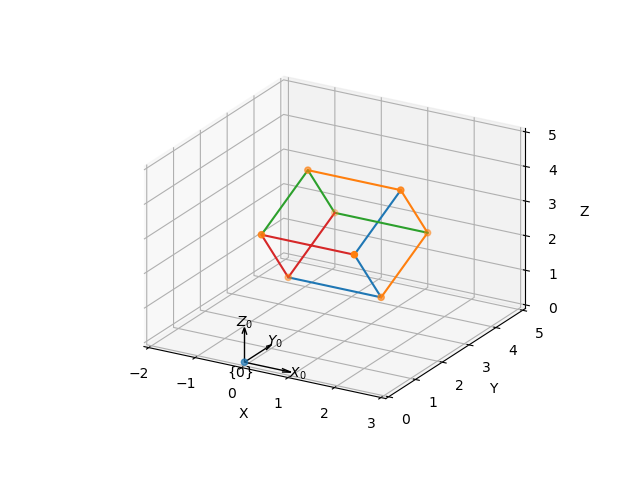

In [68]:
fig = plt.figure()
SE3().plot(frame='0', dims=[-2,3,0,5,0,5], color='black')
ax = plt.gca()
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z');
ax.scatter(xs=Q[0], ys=Q[1], zs=Q[2], s=20)  # draw vertices

# draw lines joining the vertices
lines = [[0,1,5,6], [1,2,6,7], [2,3,7,4], [3,0,4,5]]
for line in lines:
    ax.plot([Q[0,i] for i in line], [Q[1,i] for i in line], [Q[2,i] for i in line])

This is often used in SLAM and bundle adjustment algorithms since it is compact and better behaved than using roll-pitch-yaw or Euler angles.

# Working in 2D

Things are actually much simpler in 2D.  There's only one possible rotation which is around an axis perpendicular to the plane (where the z-axis would have been if it were in 3D).

Rotations in 2D can be represented by rotation matrices – 2x2 orthonormal matrices – which belong to the group SO(2). Just as for the 3D case these matrices have special properties, each column (and row) is a unit vector, and they are all orthogonal, the inverse of this matrix is equal to its transpose, and its determinant is +1.

We can create such a matrix, a rotation of $\pi/4$ radians by

In [ ]:
R = SO2(math.pi/4)
R

or in degrees

In [ ]:
SO2(45, unit='deg')

and we can plot this on the 2D plane

In [ ]:
plt.figure() # create a new figure
R.plot()

Once again, it's useful to describe the position of things and we do this this with a homogeneous transformation matrix – a 3x3 matrix – which belong to the group SE(2).

In [ ]:
T = SE2(1, 2)
T

which has a similar structure to the 3D case.  The rotation matrix is in the top-left corner and the translation components are in the right-most column.

We can also call the function with the element in a list

In [ ]:
T = SE2([1, 2])

In [ ]:
plt.figure() # create a new figure
T.plot()

In [ ]:
T = SE2(1, 2) @ SE2(45, 'deg')
T

In [ ]:
plt.figure() # create a new figure
T.plot()

In [ ]:
\cbullet

The inplace versions of operators are also supported, for example

In [ ]:
X = T
X /= T2
X

# Operators

The classes we have introduced mimic the behavior the mathematical groups $\mbox{SO}(3)$ and $\mbox{SE}(3)$ which contain matrices of particular structure. They are subsets respectively of the sets of all possible real 3x3 and 4x4 matrices.

The only operations on two elements of the group that also belongs to the group are composition (represented by the `*` operator) and inversion.

In [69]:
T1 = SE3(1, 2, 3) * SE3.Rx(30, 'deg')
[type(T), type(T.inv), type(T*T)]

[spatialmath.pose3d.SE3, spatialmath.pose3d.SE3, spatialmath.pose3d.SE3]

If we know the pose of frame {2} and a _rigid body motion_ from frame {1} to frame {2}

In [ ]:
T2 = SE3(4, 5, 6) * SE3.Ry(-40, 'deg')
T12 = SE3(0, -2, -1) * SE3.Rz(70, 'deg')

then ${}^0{\bf T}_1 \bullet {}^1{\bf T}_2 = {}^0{\bf T}_2$ then ${}^0{\bf T}_1 =  {}^1{\bf T}_2 \bullet ({}^0{\bf T}_2)^{-1}$ which we write as

In [148]:
T * T2.inv

[0] =
   0.766044  0        -0.642788  0          
   0         1         0         0          
   0.642788  0         0.766044  0          
   0         0         0         1          
[1] =
   0.766044  0        -0.642788  0          
  -0.0641717 0.995004 -0.0764768 0          
   0.639576  0.0998334 0.762217  0          
   0         0         0         1          
[2] =
   0.766044  0        -0.642788  0          
  -0.127702  0.980067 -0.15219   0          
   0.629975  0.198669  0.750775  0          
   0         0         0         1          
[3] =
   0.766044  0        -0.642788  0          
  -0.189957  0.955336 -0.226382  0          
   0.614078  0.29552   0.73183   0          
   0         0         0         1          
[4] =
   0.766044  0        -0.642788  0          
  -0.250313  0.921061 -0.298312  0          
   0.592047  0.389418  0.705574  0          
   0         0         0         1          
[5] =
   0.766044  0        -0.642788  0          
  -0.308169  0.8775

or more concisely as

In [149]:
T / T2

[0] =
   0.766044  0        -0.642788  0          
   0         1         0         0          
   0.642788  0         0.766044  0          
   0         0         0         1          
[1] =
   0.766044  0        -0.642788  0          
  -0.0641717 0.995004 -0.0764768 0          
   0.639576  0.0998334 0.762217  0          
   0         0         0         1          
[2] =
   0.766044  0        -0.642788  0          
  -0.127702  0.980067 -0.15219   0          
   0.629975  0.198669  0.750775  0          
   0         0         0         1          
[3] =
   0.766044  0        -0.642788  0          
  -0.189957  0.955336 -0.226382  0          
   0.614078  0.29552   0.73183   0          
   0         0         0         1          
[4] =
   0.766044  0        -0.642788  0          
  -0.250313  0.921061 -0.298312  0          
   0.592047  0.389418  0.705574  0          
   0         0         0         1          
[5] =
   0.766044  0        -0.642788  0          
  -0.308169  0.8775

## Non-group operations

Operations such as addition and subtraction are valid for matrices but not for elements of the group, therefore these operations will return a numpy array rather than a group object

In [150]:
SE3() + SE3()

array([[2., 0., 0., 0.],
       [0., 2., 0., 0.],
       [0., 0., 2., 0.],
       [0., 0., 0., 2.]])

yields an array, not an `SE3` object. As do other operations

In [151]:
2 * SE3()

array([[2., 0., 0., 0.],
       [0., 2., 0., 0.],
       [0., 0., 2., 0.],
       [0., 0., 0., 2.]])

In [152]:
SE3() - 1

array([[ 0., -1., -1., -1.],
       [-1.,  0., -1., -1.],
       [-1., -1.,  0., -1.],
       [-1., -1., -1.,  0.]])

Similar principles apply to quaternions.  Unit quaternions are a group and only support composition and inversion.  Any other operations will return an ordinary quaternion

In [154]:
UnitQuaternion() * 2

2.000000 < 0.000000, 0.000000, 0.000000 >

which is indicated by the single angle brackets.

# Implicit lists

For many tasks we might want to have a group or sequence of rotations or poses. The obvious solution would be to use a Python list

In [153]:
T = [ SE3.Rx(0), SE3.Rx(0.1), SE3.Rx(0.2), SE3.Rx(0.3), SE3.Rx(0.4)]

but we can actually put this list inside the pose object.  There are a few ways to do this, most obviously

In [71]:
T = SE3( [ SE3.Rx(0), SE3.Rx(0.1), SE3.Rx(0.2), SE3.Rx(0.3), SE3.Rx(0.4)] )

which has the same type as an individual pose object

In [72]:
type(T)

spatialmath.pose3d.SE3

but it has length of six

In [73]:
len(T)

5

and when we display it we can see the individual elements

In [74]:
T

[0] =
   1         0         0         0          
   0         1         0         0          
   0         0         1         0          
   0         0         0         1          
[1] =
   1         0         0         0          
   0         0.995004 -0.0998334 0          
   0         0.0998334 0.995004  0          
   0         0         0         1          
[2] =
   1         0         0         0          
   0         0.980067 -0.198669  0          
   0         0.198669  0.980067  0          
   0         0         0         1          
[3] =
   1         0         0         0          
   0         0.955336 -0.29552   0          
   0         0.29552   0.955336  0          
   0         0         0         1          
[4] =
   1         0         0         0          
   0         0.921061 -0.389418  0          
   0         0.389418  0.921061  0          
   0         0         0         1          

which we can index

In [75]:
T[3]

   1         0         0         0          
   0         0.955336 -0.29552   0          
   0         0.29552   0.955336  0          
   0         0         0         1          

or slice

In [76]:
T[1:4]

[0] =
   1         0         0         0          
   0         0.995004 -0.0998334 0          
   0         0.0998334 0.995004  0          
   0         0         0         1          
[1] =
   1         0         0         0          
   0         0.980067 -0.198669  0          
   0         0.198669  0.980067  0          
   0         0         0         1          
[2] =
   1         0         0         0          
   0         0.955336 -0.29552   0          
   0         0.29552   0.955336  0          
   0         0         0         1          

We could another pose to the end

In [77]:
T.append( SE3.Rx(0.5) )
len(T)

6

The `SE3` class, like all the classes in this package, inherits from the `UserList` class giving it all the methods of a Python list like append, extend, del etc.  We can also use them as _iterables_ in _for_ loops and in list comprehensions.

We could write the above example more succinctly

In [78]:
T = SE3.Rx( np.linspace(0, 0.5, 6) )
len(T)

6

In [79]:
T[3]

   1         0         0         0          
   0         0.955336 -0.29552   0          
   0         0.29552   0.955336  0          
   0         0         0         1          

Consider another rotation

In [80]:
T2 = SE3.Ry(40, 'deg')

If we write

In [81]:
A = T * T2
len(A)

6

we obtain a new list where each element of `A` is `T[i] * T2`.  Similarly

In [ ]:
B = T2 * T
len(B)

which has produced a new list where each element of `B` is `T2 * T[i]`.

Similarly

In [ ]:
C = T * T
len(C)

yields a new list where each element of `C` is the `T[i] * T[i]`.  

We can apply such a sequence to a coordinate vectors as we did earlier

In [ ]:
P = T * [0, 1, 0]
P

where each element of `T` has transformed the coordinate vector (0, 1, 0), the results being consecutive columns of the resulting numpy array.

This is equivalent to writing

In [ ]:
np.ndarray( [_T * [0,1,0] for _T in T])